# Portuguese Students

Since there is no clear, sure-fire way to analyze both datasets simultaneously, this notebook will contain the analyses for the Portuguese Students only

## Importing Libraries & Data

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("student-por.csv", sep = ';')

pd.options.display.max_columns = 100

In [46]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [47]:
df.shape

(649, 33)

In [48]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No null values

In [49]:
df.duplicated().sum()

0

No duplicate rows

In [50]:
#for i in df.columns:
 #   print(i, ":",sorted(df[i].unique()),',', len(df[i].unique()))

## Data Summary

### Numeric Variables 
- Age (Can be considered Categorical)
- Absences
- Failures *(Can also be considered Categorical - Number of past class failures from 0 to 4)*
- G1
- G2
- **G3** (target variable)

### Categorical Variables

#### Ordinal Varaibles
- Medu *(Mother's education level on a scale from 0 to 4)*
- Fedu *(Father's education level on a scale from 0 to 4)*
- Traveltime *(Travel time from home to school on a scale from 1 to 4, increasing in time)*
- Studytime *(Weekly Study time on a scale from 1 to 4)*
- Famrel *(Quality of family relationship on a scale from 1 to 5, increasing in quality)*
- Freetime *(Free time after school on a scale from 1 to 5)*
- Goout *(How often student goes out with friends on a scale from 1 to 5)*
- Dalc *(Workday alcohol consumption on a scale from 1 to 5)*
- Walc *(Weekend alcohol consumption on a scale from 1 to 5)*
- Health *(Current health status on a scale from 1 to 5)*


#### Binary Variables
- School *(GP or MS)*
- Sex *(M or F)*
- Address *(R - rural or U - urban)*
- FamSize *(Less than 3 people or Greater than 3 people)*
- PStatus *(T - parents living together or A - parents living apart)*
- SchoolsUp *(Extra educational support or not)*
- Famsup *(Family educational supoprt or not)*
- Paid *(Extra paid courses in the subject or not)*
- Activities *(Extra curricular activities or not)*
- Nursery *(Student attended nursery or not)*
- Higher *(Want to take Higher education or not)*
- Internet *(Has internet access at home or not)*
- Romantic *(In a romantic relationship or not)*

#### Other
- Mjob *(Mother's job)*
- Fjob *(Father's job)*
- Reason *(Reason to choose the school)*
- Guardian *(Student's guardian)*

## Features to be encoded:

### Ordinal (not necessary)
**(Will not be encoded yet, when building the model)**

### Binary:
**All values to be turned into 0s and 1s**

### Categorical Variables

In [51]:
binary_mapping = {
    'school': {'GP': 0, 'MS': 1},
    'sex': {'M': 0, 'F': 1},
    'address': {'R': 0, 'U': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1}
}

for column, mapping in binary_mapping.items():
    df[column] = df[column].map(mapping)

#df.head()

## Correlations:

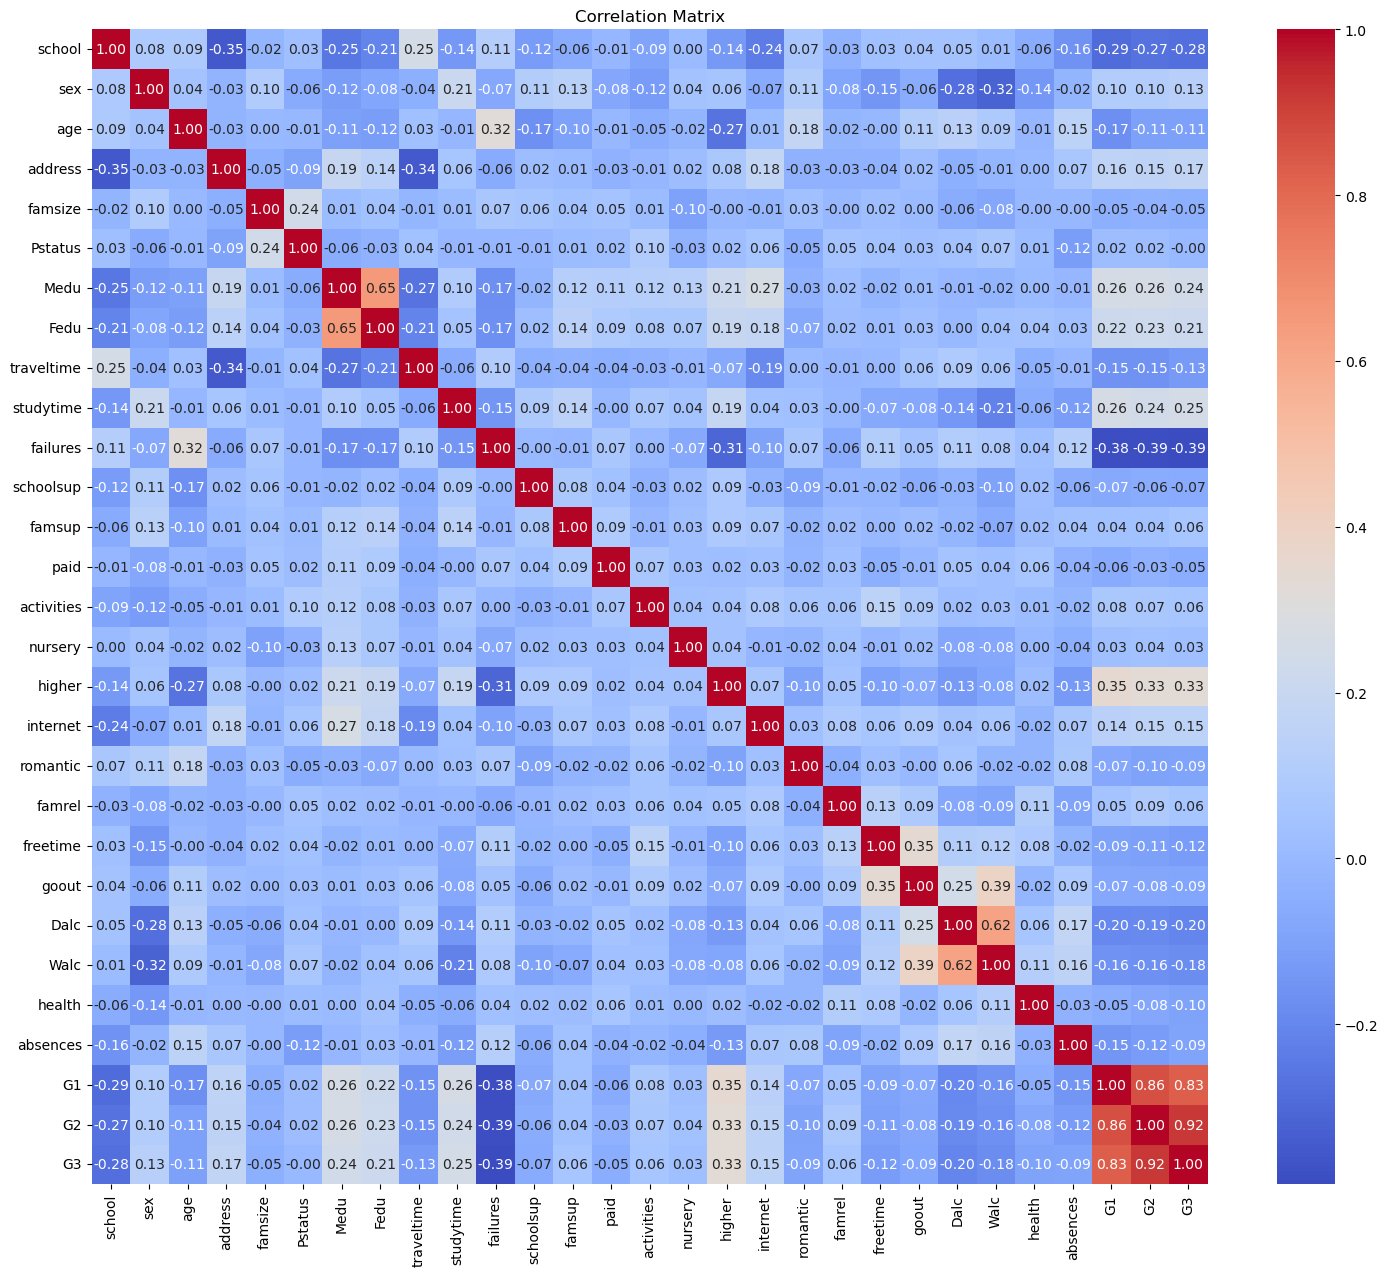

In [52]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Note to Self:
It is generally okay to include **categorical variables that have been mapped to numerical values** in a correlation matrix, but there are a few important considerations:

**Ordinal Variables**: If variables have an inherent order (e.g., education level: high school < college < graduate), then mapping them to numerical values *is appropriate*

**Binary Variables**: For binary categorical variables (e.g. sex (M/F)) it is also acceptable to map them to 0s and 1s

***HOWEVER***, when it comes to *nominal* variables (no inherent order, e.g., color) mapping them to numbers **can be misleading** since these categories are **simply labels** without a true numerical meaning

Using a correlation matrix is **not the most robust/comprehensive method** for **detecting multicollinearity**, however it is a good starting point, here are two methods that can be used instead:

1. Variance Inflation Factor (VIF):
2. PCA

In [53]:
target = 'G3'
X = df.drop(columns=[target])
y = df[target]

## Manual Feature Selection:

#### T-test (For Binary Variables)

In [54]:
from scipy.stats import ttest_ind

selected_features = []

binary_variables = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for var in binary_variables:
    group_0 = df[df[var] == 0][target]
    group_1 = df[df[var] == 1][target]
    
    t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
    if p_val < 0.05:
        selected_features.append(var)
    
    print(f"Binary Variable: {var}, T-statistic: {t_stat:.4f}, P-value: {p_val:.4e}")

Binary Variable: school, T-statistic: 6.7545, P-value: 6.2118e-11
Binary Variable: sex, T-statistic: -3.2747, P-value: 1.1246e-03
Binary Variable: address, T-statistic: -4.0199, P-value: 7.2739e-05
Binary Variable: famsize, T-statistic: 1.2124, P-value: 2.2606e-01
Binary Variable: Pstatus, T-statistic: 0.0192, P-value: 9.8469e-01
Binary Variable: schoolsup, T-statistic: 2.2474, P-value: 2.6753e-02
Binary Variable: famsup, T-statistic: -1.4444, P-value: 1.4930e-01
Binary Variable: paid, T-statistic: 1.5707, P-value: 1.2333e-01
Binary Variable: activities, T-statistic: -1.5238, P-value: 1.2804e-01
Binary Variable: nursery, T-statistic: -0.7719, P-value: 4.4104e-01
Binary Variable: higher, T-statistic: -9.1593, P-value: 2.3231e-14
Binary Variable: internet, T-statistic: -3.6580, P-value: 3.1533e-04
Binary Variable: romantic, T-statistic: 2.2129, P-value: 2.7425e-02


#### ANOVA Tests (For categorical variables with 3+ groups)

In [55]:
from scipy.stats import f_oneway
from sklearn.feature_selection import f_classif

categorical_columns = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime' ,'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
for col in categorical_columns:
    groups = [y[X[col] == value] for value in X[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    if p_value < 0.05:
        selected_features.append(col)

    print(f"Feature: {col}, F-statistic: {f_stat}, P-value: {p_value}")

Feature: Medu, F-statistic: 10.764276866816425, P-value: 1.8856851949016492e-08
Feature: Fedu, F-statistic: 8.223361707146887, P-value: 1.7991136867942303e-06
Feature: Mjob, F-statistic: 7.370224291121831, P-value: 8.305149884947421e-06
Feature: Fjob, F-statistic: 3.2726805958419667, P-value: 0.01137628062360572
Feature: reason, F-statistic: 10.248465509132915, P-value: 1.3416422874904325e-06
Feature: guardian, F-statistic: 2.63816697870449, P-value: 0.07226239503367193
Feature: traveltime, F-statistic: 3.6588402487405807, P-value: 0.012321097062069852
Feature: studytime, F-statistic: 15.876267993177123, P-value: 5.705728458962843e-10
Feature: famrel, F-statistic: 3.6779077023875284, P-value: 0.005684830602219902
Feature: freetime, F-statistic: 4.488592643212423, P-value: 0.001389612248145489
Feature: goout, F-statistic: 6.985936355765734, P-value: 1.6524803939952414e-05
Feature: Dalc, F-statistic: 8.193253061643448, P-value: 1.8989671842550212e-06
Feature: Walc, F-statistic: 5.5353921

In [56]:
numerical_cols = ['age', 'absences', 'failures', 'G1', 'G2']

f_scores, p_values = f_classif(X[numerical_cols], y)

for col, f_score, p_value in zip(numerical_cols, f_scores, p_values):
    if p_value < 0.05:
        selected_features.append(col)
    print(f"Feature: {col}, F-score: {f_score}, P-value: {p_value}")

Feature: age, F-score: 3.95239784255718, P-value: 3.643612450462716e-07
Feature: absences, F-score: 3.3039432169661076, P-value: 1.4067081056503124e-05
Feature: failures, F-score: 13.086710431403512, P-value: 2.3054030704503016e-30
Feature: G1, F-score: 138.99463858847798, P-value: 1.221878780256933e-194
Feature: G2, F-score: 289.967724005142, P-value: 2.200081021191747e-278


In [57]:
print("Selected Features: ", selected_features)

Selected Features:  ['school', 'sex', 'address', 'schoolsup', 'higher', 'internet', 'romantic', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'age', 'absences', 'failures', 'G1', 'G2']


# Building the Model:

## 1. Manual Feature Selection (p_value <0.05)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
df_sfeatures = df[selected_features]
df_sfeatures['G3'] = y
df_sfeatures.head()

/var/folders/zv/1m98_z_97fvbrw_fd26b6ndr0000gn/T/ipykernel_28863/3837514836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sfeatures['G3'] = y


,school,sex,address,schoolsup,higher,internet,romantic,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,age,absences,failures,G1,G2,G3
0,0,1,1,1,1,0,0,4,4,at_home,teacher,course,2,2,4,3,4,1,1,3,18,4,0,0,11,11
1,0,1,1,0,1,1,0,1,1,at_home,other,course,1,2,5,3,3,1,1,3,17,2,0,9,11,11
2,0,1,1,1,1,1,0,1,1,at_home,other,other,1,2,4,3,2,2,3,3,15,6,0,12,13,12
3,0,1,1,0,1,1,1,4,2,health,services,home,1,3,3,2,2,1,1,5,15,0,0,14,14,14
4,0,1,1,0,1,0,0,3,3,other,other,home,1,2,4,3,2,1,2,5,16,0,0,11,13,13


In [60]:
correlations = df_sfeatures.corr(numeric_only=True, method='pearson')['G3']
print(correlations.sort_values(ascending=False))
#print(correlations[correlations.abs()>0.4].sort_values(ascending=False))

G3            1.000000
G2            0.918548
G1            0.826387
higher        0.332172
studytime     0.249789
Medu          0.240151
Fedu          0.211800
address       0.167637
internet      0.150025
sex           0.129077
famrel        0.063361
schoolsup    -0.066405
goout        -0.087641
romantic     -0.090583
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
school       -0.284294
failures     -0.393316
Name: G3, dtype: float64


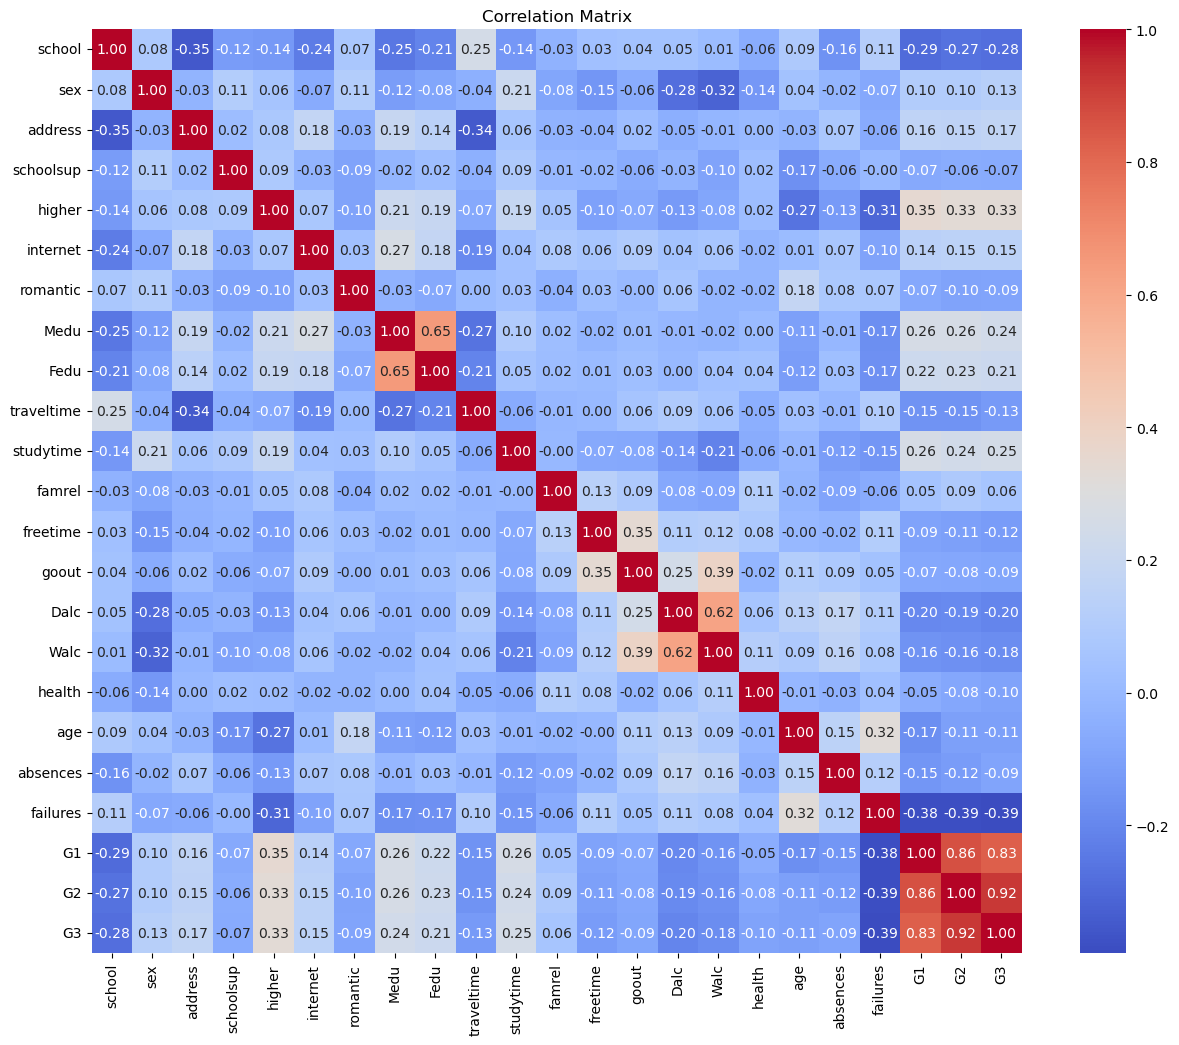

In [61]:
correlation_matrix = df_sfeatures.corr(numeric_only=True, method='pearson')

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [62]:
df_sfeatures.drop(columns=['Fedu', 'Walc'], inplace=True)
df_sfeatures.head()

/var/folders/zv/1m98_z_97fvbrw_fd26b6ndr0000gn/T/ipykernel_28863/3540642878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sfeatures.drop(columns=['Fedu', 'Walc'], inplace=True)


,school,sex,address,schoolsup,higher,internet,romantic,Medu,Mjob,Fjob,reason,traveltime,studytime,famrel,freetime,goout,Dalc,health,age,absences,failures,G1,G2,G3
0,0,1,1,1,1,0,0,4,at_home,teacher,course,2,2,4,3,4,1,3,18,4,0,0,11,11
1,0,1,1,0,1,1,0,1,at_home,other,course,1,2,5,3,3,1,3,17,2,0,9,11,11
2,0,1,1,1,1,1,0,1,at_home,other,other,1,2,4,3,2,2,3,15,6,0,12,13,12
3,0,1,1,0,1,1,1,4,health,services,home,1,3,3,2,2,1,5,15,0,0,14,14,14
4,0,1,1,0,1,0,0,3,other,other,home,1,2,4,3,2,1,5,16,0,0,11,13,13


To prevent multicollinearity:
- Medu has a strong correlation with Fedu, the one with the weaker correlation with G3 (Fedu) can be removed before encoding
- Dalc has a strong correlation with Walc, the one with the weaker correlation with G3 (Walc) can be removed before encoding

In [63]:
df_encoded = pd.get_dummies(df_sfeatures, columns = ['Mjob', 'Fjob', 'reason'], drop_first = True)

df_encoded[df_encoded.select_dtypes(include='bool').columns] = df_encoded.select_dtypes(include='bool').astype(int)
df_encoded.head()

,school,sex,address,schoolsup,higher,internet,romantic,Medu,traveltime,studytime,famrel,freetime,goout,Dalc,health,age,absences,failures,G1,G2,G3,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
0,0,1,1,1,1,0,0,4,2,2,4,3,4,1,3,18,4,0,0,11,11,0,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,1,1,0,1,1,2,5,3,3,1,3,17,2,0,9,11,11,0,0,0,0,0,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,2,4,3,2,2,3,15,6,0,12,13,12,0,0,0,0,0,1,0,0,0,1,0
3,0,1,1,0,1,1,1,4,1,3,3,2,2,1,5,15,0,0,14,14,14,1,0,0,0,0,0,1,0,1,0,0
4,0,1,1,0,1,0,0,3,1,2,4,3,2,1,5,16,0,0,11,13,13,0,1,0,0,0,1,0,0,1,0,0


In [64]:
X = df_encoded.drop(columns=['G3'])
y = df[target]

In [65]:
X.shape

(649, 31)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.4629842635954045
R-squared: 0.8499767356692657


**85.0% accuracy** - no hyperparameter tuning, manual feature selection (p_value <0.05)

## 2. Passing all features in model (no encoding)

In [69]:
X = df.iloc[:, :-1]
y = df['G3']
X = pd.get_dummies(X, columns = ['Mjob', 'Fjob', 'reason', 'guardian'], drop_first = True)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,False,False,False,False,False,True,False,False,False,False,False,False,False
2,0,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,False,False,False,False,False,True,False,False,False,True,False,True,False
3,0,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,True,False,False,False,False,False,True,False,True,False,False,True,False
4,0,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,False,True,False,False,False,True,False,False,True,False,False,False,False


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.4759092563639329
R-squared: 0.8486513286537313


**84.865% accuracy** - no hyperparameter tuning, passing in all features. Very similar to one done with manual feature selection

## 3. Passing all features in model (while encoding ordinal variables)

In [71]:
X = df.iloc[:, :-1]
y = df['G3']
X = pd.get_dummies(X, columns = ['Mjob', 'Fjob', 'reason', 'guardian'], drop_first = True)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,False,False,False,False,False,True,False,False,False,False,False,False,False
2,0,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,False,False,False,False,False,True,False,False,False,True,False,True,False
3,0,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,True,False,False,False,False,False,True,False,True,False,False,True,False
4,0,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,False,True,False,False,False,True,False,False,True,False,False,False,False


In [72]:
cat_cols_encode = ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
X = pd.get_dummies(X, columns=cat_cols_encode, drop_first=True)

X[X.select_dtypes(include='bool').columns] = X.select_dtypes(include='bool').astype(int)
X.head()

,school,sex,age,address,famsize,Pstatus,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,absences,G1,G2,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_1,Fedu_2,Fedu_3,Fedu_4,traveltime_2,traveltime_3,traveltime_4,studytime_2,studytime_3,studytime_4,famrel_2,famrel_3,famrel_4,famrel_5,freetime_2,freetime_3,freetime_4,freetime_5,goout_2,goout_3,goout_4,goout_5,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,0,1,18,1,1,0,0,1,0,0,0,1,1,0,0,4,0,11,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,17,1,1,1,0,0,1,0,0,0,1,1,0,2,9,11,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,15,1,0,1,0,1,0,0,0,1,1,1,0,6,12,13,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,0,1,15,1,1,1,0,0,1,0,1,1,1,1,1,0,14,14,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,16,1,1,1,0,0,1,0,0,1,1,0,0,0,11,13,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.6683111177079586
R-squared: 0.8289212768545393


Passing all features in WITH ENCODING, accuracy is LOWER @82.9%

After analysis, it turns out that encoding the ordinal numerical variables (Medu, traveltime etc.) essentially *removes* the ranking of the different categories, treating all categories as **equally distinct**.

Additionally, using numeric representation **reduces dimensionality** whereas one-hot encoding **unnecessarily expands the dataset**.

## 4. Alter manual feature selection (p_val < 0.01 instead of <0.05)

#### T-test (For Binary Variables)

In [74]:
target = 'G3'
X = df.drop(columns=[target])
y = df[target]

In [75]:
from scipy.stats import ttest_ind

selected_features = []

binary_variables = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for var in binary_variables:
    group_0 = df[df[var] == 0][target]
    group_1 = df[df[var] == 1][target]
    
    t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
    if p_val < 0.01:
        selected_features.append(var)
    
    print(f"Binary Variable: {var}, T-statistic: {t_stat:.4f}, P-value: {p_val:.4e}")

Binary Variable: school, T-statistic: 6.7545, P-value: 6.2118e-11
Binary Variable: sex, T-statistic: -3.2747, P-value: 1.1246e-03
Binary Variable: address, T-statistic: -4.0199, P-value: 7.2739e-05
Binary Variable: famsize, T-statistic: 1.2124, P-value: 2.2606e-01
Binary Variable: Pstatus, T-statistic: 0.0192, P-value: 9.8469e-01
Binary Variable: schoolsup, T-statistic: 2.2474, P-value: 2.6753e-02
Binary Variable: famsup, T-statistic: -1.4444, P-value: 1.4930e-01
Binary Variable: paid, T-statistic: 1.5707, P-value: 1.2333e-01
Binary Variable: activities, T-statistic: -1.5238, P-value: 1.2804e-01
Binary Variable: nursery, T-statistic: -0.7719, P-value: 4.4104e-01
Binary Variable: higher, T-statistic: -9.1593, P-value: 2.3231e-14
Binary Variable: internet, T-statistic: -3.6580, P-value: 3.1533e-04
Binary Variable: romantic, T-statistic: 2.2129, P-value: 2.7425e-02


#### ANOVA Tests (For categorical variables with 3+ groups)

In [76]:
from scipy.stats import f_oneway
from sklearn.feature_selection import f_classif

categorical_columns = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime' ,'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
for col in categorical_columns:
    groups = [y[X[col] == value] for value in X[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    if p_value < 0.01:
        selected_features.append(col)

    print(f"Feature: {col}, F-statistic: {f_stat}, P-value: {p_value}")

Feature: Medu, F-statistic: 10.764276866816425, P-value: 1.8856851949016492e-08
Feature: Fedu, F-statistic: 8.223361707146887, P-value: 1.7991136867942303e-06
Feature: Mjob, F-statistic: 7.370224291121831, P-value: 8.305149884947421e-06
Feature: Fjob, F-statistic: 3.2726805958419667, P-value: 0.01137628062360572
Feature: reason, F-statistic: 10.248465509132915, P-value: 1.3416422874904325e-06
Feature: guardian, F-statistic: 2.63816697870449, P-value: 0.07226239503367193
Feature: traveltime, F-statistic: 3.6588402487405807, P-value: 0.012321097062069852
Feature: studytime, F-statistic: 15.876267993177123, P-value: 5.705728458962843e-10
Feature: famrel, F-statistic: 3.6779077023875284, P-value: 0.005684830602219902
Feature: freetime, F-statistic: 4.488592643212423, P-value: 0.001389612248145489
Feature: goout, F-statistic: 6.985936355765734, P-value: 1.6524803939952414e-05
Feature: Dalc, F-statistic: 8.193253061643448, P-value: 1.8989671842550212e-06
Feature: Walc, F-statistic: 5.5353921

In [77]:
numerical_cols = ['age', 'absences', 'failures', 'G1', 'G2']

f_scores, p_values = f_classif(X[numerical_cols], y)

for col, f_score, p_value in zip(numerical_cols, f_scores, p_values):
    if p_value < 0.01:
        selected_features.append(col)
    print(f"Feature: {col}, F-score: {f_score}, P-value: {p_value}")

Feature: age, F-score: 3.95239784255718, P-value: 3.643612450462716e-07
Feature: absences, F-score: 3.3039432169661076, P-value: 1.4067081056503124e-05
Feature: failures, F-score: 13.086710431403512, P-value: 2.3054030704503016e-30
Feature: G1, F-score: 138.99463858847798, P-value: 1.221878780256933e-194
Feature: G2, F-score: 289.967724005142, P-value: 2.200081021191747e-278


In [78]:
print("Selected Features: ", selected_features)

Selected Features:  ['school', 'sex', 'address', 'higher', 'internet', 'Medu', 'Fedu', 'Mjob', 'reason', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'age', 'absences', 'failures', 'G1', 'G2']


In [79]:
X = X[selected_features]
X = pd.get_dummies(X, columns = ['Mjob', 'reason'], drop_first = True)
X[X.select_dtypes(include='bool').columns] = X.select_dtypes(include='bool').astype(int)
X.head()

,school,sex,address,higher,internet,Medu,Fedu,studytime,famrel,freetime,goout,Dalc,Walc,age,absences,failures,G1,G2,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_home,reason_other,reason_reputation
0,0,1,1,1,0,4,4,2,4,3,4,1,1,18,4,0,0,11,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,2,5,3,3,1,1,17,2,0,9,11,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,2,4,3,2,2,3,15,6,0,12,13,0,0,0,0,0,1,0
3,0,1,1,1,1,4,2,3,3,2,2,1,1,15,0,0,14,14,1,0,0,0,1,0,0
4,0,1,1,1,0,3,3,2,4,3,2,1,2,16,0,0,11,13,0,1,0,0,1,0,0


In [80]:
X.shape

(649, 25)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.4704669780521789
R-squared: 0.8492094128232214


**84.9%**, almost the same as previous two, passing in 25 columns instead of 31 in (p_value <0.05)

If it is optimal to use Linear Regression, it would be better to proceed with this model which uses fewer dimensions

## Trying XGBoost:

In [82]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.7970063879826053
R-squared: 0.8157241344451904


In [83]:
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

# Hyperparameter Tuning

## Grid Search

In [84]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=LinearRegression(), param_grid = param_grid, cv=5, scoring='r2') #try a larger cv since this is a relatively small dataset
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R-Squared: {grid_search.best_score_}")

Best Parameters: {'fit_intercept': False, 'positive': True}
Best R-Squared: 0.8446219948224585


#### Explanation of Hyperparameters:

fit_intercept: decides wheter to calculate the intercept for the model
positive: decides whether the model coefficients will be forced to be positive or not

I also came across Ridge & Lasso Regression Tuning. However, to keep it simple, I decided to proceed with base linear regression tuning.

Ridge & Lasso Regression tuning are important for preventing overfitting & multicollinearity (Ridge for Stability, Lasso for Feature Selection)

In [85]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)